In [1]:
!pip install scikit-posthocs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# INFERENCIA ESTADÍSTICA SUPONIENDO QUE HAY NORMALIDAD (Usamos t-Student para muestras independientes)
import pandas as pd
import scipy.stats as stats

# Cargar el archivo con las accuracies por categoría
file_path = 'CATEGORIES_ACCURACY.xlsx'

df_mmlu = pd.read_excel(file_path, sheet_name='MMLU', engine='openpyxl')
df_mmlu_pro = pd.read_excel(file_path, sheet_name='MMLU_pro', engine='openpyxl')

# Seleccionar las columnas de accuracy (excluyendo 'CATEGORY')
model_columns = df_mmlu.columns[1:]

# Aplicar el test de Kolmogorov-Smirnov a cada modelo
for model in model_columns:
    ks_stat, ks_p = stats.kstest(df_mmlu[model].dropna(), 'norm')
    print(f"{model}: p-value Kolmogorov-Smirnov = {ks_p}")

# Seleccionar dos modelos a comparar
modelo_1 = 'Llama-3.1-8B-Instruct_en_l0'
modelo_2 = 'Mistral-7B-Instruct-v0.3_en_l0'

# Prueba t de Student (para muestras independientes)
t_stat, p_value = stats.ttest_ind(df_mmlu[modelo_1].dropna(), df_mmlu[modelo_2].dropna(), equal_var=False)

print(f"t-Student entre {modelo_1} y {modelo_2}: p-value = {p_value}")

# Prueba Mann-Whitney U
u_stat, p_value = stats.mannwhitneyu(df_mmlu[modelo_1].dropna(), df_mmlu[modelo_2].dropna(), alternative='two-sided')

print(f"Mann-Whitney U entre {modelo_1} y {modelo_2}: p-value = {p_value}")


Llama-3.1-8B-Instruct_en_l0: p-value Kolmogorov-Smirnov = 1.119981437003064e-22
Llama-3.1-8B-Instruct_en_l1: p-value Kolmogorov-Smirnov = 1.0059079418568417e-19
Yi-6B-Chat_en_l0: p-value Kolmogorov-Smirnov = 1.0580249967779195e-13
Yi-6B-Chat_en_l1: p-value Kolmogorov-Smirnov = 6.635936901087454e-14
ChatGPT-4o-mini_en_l0: p-value Kolmogorov-Smirnov = 7.646873892603768e-23
ChatGPT-4o-mini_en_l1: p-value Kolmogorov-Smirnov = 1.746899101996759e-23
gemma-2-9b-it_en_l0: p-value Kolmogorov-Smirnov = 1.119981437003064e-22
gemma-2-9b-it_en_l1: p-value Kolmogorov-Smirnov = 6.662736363983591e-22
Mistral-7B-Instruct-v0.3_en_l0: p-value Kolmogorov-Smirnov = 1.1248360838908301e-18
Mistral-7B-Instruct-v0.3_en_l1: p-value Kolmogorov-Smirnov = 4.485712403648636e-16
t-Student entre Llama-3.1-8B-Instruct_en_l0 y Mistral-7B-Instruct-v0.3_en_l0: p-value = 3.539719794835126e-08
Mann-Whitney U entre Llama-3.1-8B-Instruct_en_l0 y Mistral-7B-Instruct-v0.3_en_l0: p-value = 2.396001807659418e-07


In [3]:
from itertools import combinations

# Obtener todas las combinaciones de modelos
model_pairs = list(combinations(model_columns, 2))

# Evaluar cada pareja de modelos
results = []
for modelo_1, modelo_2 in model_pairs:
    t_stat, p_value = stats.ttest_ind(df_mmlu[modelo_1].dropna(), df_mmlu[modelo_2].dropna(), equal_var=False)
    results.append((modelo_1, modelo_2, p_value))

# Convertir en DataFrame y guardar resultados
df_results = pd.DataFrame(results, columns=['Modelo_1', 'Modelo_2', 'p-value'])
df_results.to_excel('Resultados_Comparacion_Modelos.xlsx', index=False)

print(df_results)

                          Modelo_1                        Modelo_2  \
0      Llama-3.1-8B-Instruct_en_l0     Llama-3.1-8B-Instruct_en_l1   
1      Llama-3.1-8B-Instruct_en_l0                Yi-6B-Chat_en_l0   
2      Llama-3.1-8B-Instruct_en_l0                Yi-6B-Chat_en_l1   
3      Llama-3.1-8B-Instruct_en_l0           ChatGPT-4o-mini_en_l0   
4      Llama-3.1-8B-Instruct_en_l0           ChatGPT-4o-mini_en_l1   
5      Llama-3.1-8B-Instruct_en_l0             gemma-2-9b-it_en_l0   
6      Llama-3.1-8B-Instruct_en_l0             gemma-2-9b-it_en_l1   
7      Llama-3.1-8B-Instruct_en_l0  Mistral-7B-Instruct-v0.3_en_l0   
8      Llama-3.1-8B-Instruct_en_l0  Mistral-7B-Instruct-v0.3_en_l1   
9      Llama-3.1-8B-Instruct_en_l1                Yi-6B-Chat_en_l0   
10     Llama-3.1-8B-Instruct_en_l1                Yi-6B-Chat_en_l1   
11     Llama-3.1-8B-Instruct_en_l1           ChatGPT-4o-mini_en_l0   
12     Llama-3.1-8B-Instruct_en_l1           ChatGPT-4o-mini_en_l1   
13     Llama-3.1-8B-

In [5]:
import pandas as pd
import scipy.stats as stats
import itertools

def check_normality(df):
    """Verifica normalidad en las columnas de accuracy usando Kolmogorov-Smirnov."""
    normality_results = {}
    model_columns = df.columns[1:]  # Excluir la columna 'CATEGORY'

    for model in model_columns:
        ks_stat, ks_p = stats.kstest(df[model].dropna(), 'norm')
        normality_results[model] = ks_p

    return normality_results

def check_homogeneity(df):
    """Verifica homogeneidad de varianza entre modelos usando la prueba de Levene."""
    models = df.columns[1:]
    results = {}
    
    for model1, model2 in itertools.combinations(models, 2):
        stat, p_value = stats.levene(df[model1].dropna(), df[model2].dropna())
        results[(model1, model2)] = p_value
    
    return results

def compare_models(df):
    """Compara modelos usando t-Student o Mann-Whitney U según normalidad y homogeneidad."""
    normality = check_normality(df)
    homogeneity = check_homogeneity(df)
    results = []
    models = df.columns[1:]

    for model1, model2 in itertools.combinations(models, 2):
        if normality[model1] > 0.05 and normality[model2] > 0.05:
            # Datos normales, revisar varianzas
            if homogeneity[(model1, model2)] > 0.05:
                # Varianzas homogéneas -> t-Student estándar
                stat, p_value = stats.ttest_ind(df[model1].dropna(), df[model2].dropna())
                test_used = "t-Student"
            else:
                # Varianzas diferentes -> t-Student de Welch
                stat, p_value = stats.ttest_ind(df[model1].dropna(), df[model2].dropna(), equal_var=False)
                test_used = "t-Student (Welch)"
        else:
            # Datos no normales -> Mann-Whitney U
            stat, p_value = stats.mannwhitneyu(df[model1].dropna(), df[model2].dropna(), alternative='two-sided')
            test_used = "Mann-Whitney U"
        
        results.append([model1, model2, p_value, test_used])
    
    return pd.DataFrame(results, columns=["Modelo 1", "Modelo 2", "p-valor", "Test aplicado"])

# Cargar el archivo Excel y seleccionar la hoja
file_path = "CATEGORIES_ACCURACY.xlsx"
xls = pd.ExcelFile(file_path)
df_mmlu = pd.read_excel(xls, sheet_name="MMLU", engine="openpyxl")
df_mmlu_pro = pd.read_excel(xls, sheet_name="MMLU_pro", engine="openpyxl")

# Aplicar las pruebas
df_results_mmlu = compare_models(df_mmlu)
df_results_mmlu_pro = compare_models(df_mmlu_pro)

# Guardar los resultados en un nuevo archivo Excel
output_file = "Statistical_Analysis_Results.xlsx"
with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df_results_mmlu.to_excel(writer, sheet_name="MMLU", index=False)
    df_results_mmlu_pro.to_excel(writer, sheet_name="MMLU_pro", index=False)

print(f"Resultados guardados en {output_file}")



Resultados guardados en Statistical_Analysis_Results.xlsx


In [6]:
import pandas as pd
import scipy.stats as stats
import itertools

def check_normality(series):
    """Verifica normalidad en una serie usando Kolmogorov-Smirnov."""
    ks_stat, ks_p = stats.kstest(series.dropna(), 'norm')
    return ks_p

def check_homogeneity(series1, series2):
    """Verifica homogeneidad de varianza entre dos series usando la prueba de Levene."""
    stat, p_value = stats.levene(series1.dropna(), series2.dropna())
    return p_value

def compare_models_by_category(df):
    """Compara modelos dentro de cada categoría usando t-Student o Mann-Whitney U según normalidad y homogeneidad."""
    results = []
    categories = df['CATEGORY'].unique()
    model_columns = [col for col in df.columns if col != 'CATEGORY']
    
    for category in categories:
        df_category = df[df['CATEGORY'] == category]
        for model1, model2 in itertools.combinations(model_columns, 2):
            series1 = df_category[model1]
            series2 = df_category[model2]
            
            normal1 = check_normality(series1)
            normal2 = check_normality(series2)
            
            if normal1 > 0.05 and normal2 > 0.05:
                # Datos normales, revisar varianzas
                homogeneity = check_homogeneity(series1, series2)
                if homogeneity > 0.05:
                    stat, p_value = stats.ttest_ind(series1.dropna(), series2.dropna())
                    test_used = "t-Student"
                else:
                    stat, p_value = stats.ttest_ind(series1.dropna(), series2.dropna(), equal_var=False)
                    test_used = "t-Student (Welch)"
            else:
                stat, p_value = stats.mannwhitneyu(series1.dropna(), series2.dropna(), alternative='two-sided')
                test_used = "Mann-Whitney U"
            
            results.append([category, model1, model2, p_value, test_used])
    
    return pd.DataFrame(results, columns=["Categoría", "Modelo 1", "Modelo 2", "p-valor", "Test aplicado"])

# Cargar el archivo Excel y seleccionar la hoja
file_path = "CATEGORIES_ACCURACY.xlsx"
xls = pd.ExcelFile(file_path)
df_mmlu = pd.read_excel(xls, sheet_name="MMLU", engine="openpyxl")
df_mmlu_pro = pd.read_excel(xls, sheet_name="MMLU_pro", engine="openpyxl")

# Aplicar las pruebas por categoría
df_results_mmlu = compare_models_by_category(df_mmlu)
df_results_mmlu_pro = compare_models_by_category(df_mmlu_pro)

# Guardar los resultados en un nuevo archivo Excel
output_file = "Statistical_Analysis_Results.xlsx"
with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df_results_mmlu.to_excel(writer, sheet_name="MMLU", index=False)
    df_results_mmlu_pro.to_excel(writer, sheet_name="MMLU_pro", index=False)

print(f"Resultados guardados en {output_file}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Resultados guardados en Statistical_Analysis_Results.xlsx


In [5]:
import pandas as pd
import scipy.stats as stats

# Cargar el archivo Excel
file_path = "./CATEGORIES_ACCURACY.xlsx"
xls = pd.ExcelFile(file_path)

def analyze_sheet(sheet_name):
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Extraer los modelos y calcular la pérdida normalizada (normalized loss)
    model_pairs = [(col, col.replace("_l0", "_l1")) for col in df.columns if col.endswith("_l0") and col.replace("_l0", "_l1") in df.columns]
    
    df_diff = pd.DataFrame({l0.replace("_l0", "_normalized_loss"): (df[l0] - df[l1]) / df[l0] for l0, l1 in model_pairs})
    
    # Imprimir las pérdidas normalizadas para verificar cálculo
    print(f"Pérdidas normalizadas calculadas para {sheet_name}:")
    print(df_diff.head())
    
    # Prueba de normalidad (Shapiro-Wilk) para cada modelo
    normality_results = {model: stats.shapiro(df_diff[model])[1] for model in df_diff.columns}
    
    # Prueba de homogeneidad de varianza (Levene)
    levene_stat, levene_p = stats.levene(*[df_diff[model] for model in df_diff.columns])
    
    # Elegir prueba estadística
    if all(p > 0.05 for p in normality_results.values()) and levene_p > 0.05:
        # Si todas las distribuciones son normales y hay homogeneidad de varianza -> ANOVA
        anova_stat, anova_p = stats.f_oneway(*[df_diff[model] for model in df_diff.columns])
        test_name, test_p = "ANOVA", anova_p
    else:
        # Si alguna condición no se cumple -> Kruskal-Wallis
        kw_stat, kw_p = stats.kruskal(*[df_diff[model] for model in df_diff.columns])
        test_name, test_p = "Kruskal-Wallis", kw_p
    
    return {
        "sheet": sheet_name,
        "normality": normality_results,
        "levene_p": levene_p,
        "test": test_name,
        "p_value": test_p
    }

# Analizar ambas hojas
results_mmlu = analyze_sheet("MMLU")
results_mmlu_pro = analyze_sheet("MMLU_pro")

# Mostrar resultados
results_mmlu, results_mmlu_pro



Pérdidas normalizadas calculadas para MMLU:
   Llama-3.1-8B-Instruct_en_normalized_loss  Yi-6B-Chat_en_normalized_loss  \
0                                  0.294118                       0.333333   
1                                  0.077778                       0.434783   
2                                  0.125000                       0.413333   
3                                  0.048387                       0.516129   
4                                  0.184211                       0.538922   

   ChatGPT-4o-mini_en_normalized_loss  gemma-2-9b-it_en_normalized_loss  \
0                           -0.068182                          0.196078   
1                            0.094340                          0.032967   
2                           -0.015748                          0.083333   
3                            0.180556                          0.104478   
4                            0.096491                          0.053398   

   Mistral-7B-Instruct-v0.3_en_norma

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:3336: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:3341: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


({'sheet': 'MMLU',
  'normality': {'Llama-3.1-8B-Instruct_en_normalized_loss': np.float64(0.029435849237908148),
   'Yi-6B-Chat_en_normalized_loss': np.float64(1.0),
   'ChatGPT-4o-mini_en_normalized_loss': np.float64(0.00032909850515537033),
   'gemma-2-9b-it_en_normalized_loss': np.float64(0.1530170216820601),
   'Mistral-7B-Instruct-v0.3_en_normalized_loss': np.float64(0.003859499212190179)},
  'levene_p': np.float64(nan),
  'test': 'Kruskal-Wallis',
  'p_value': np.float64(1.5114621669712109e-21)},
 {'sheet': 'MMLU_pro',
  'normality': {'Llama-3.1-8B-Instruct_en_normalized_loss': np.float64(0.4733683012110757),
   'Yi-6B-Chat_en_normalized_loss': np.float64(0.07518925472124441),
   'ChatGPT-4o-mini_en_normalized_loss': np.float64(0.9832678679503372),
   'gemma-2-9b-it_en_normalized_loss': np.float64(1.0),
   'Mistral-7B-Instruct-v0.3_en_normalized_loss': np.float64(0.6281754543868097)},
  'levene_p': np.float64(0.0008113381143251887),
  'test': 'Kruskal-Wallis',
  'p_value': np.flo


Análisis para MMLU:
Resultados de normalidad:
Llama-3.1-8B-Instruct: p-value = 0.005771641423364171 (No normal)
Yi-6B-Chat: p-value = 8.459401658284526e-10 (No normal)
ChatGPT-4o-mini: p-value = 0.008831338427599422 (No normal)
gemma-2-9b-it: p-value = 0.10443027324789245 (Normal)
Mistral-7B-Instruct-v0.3: p-value = 1.8622537876120768e-10 (No normal)

Test de Levene (homogeneidad de varianza): p-value = 0.056271155982303936 (Varianzas homogéneas)

Kruskal-Wallis: p-value = 2.1091137027334364e-19 (Diferencias significativas)


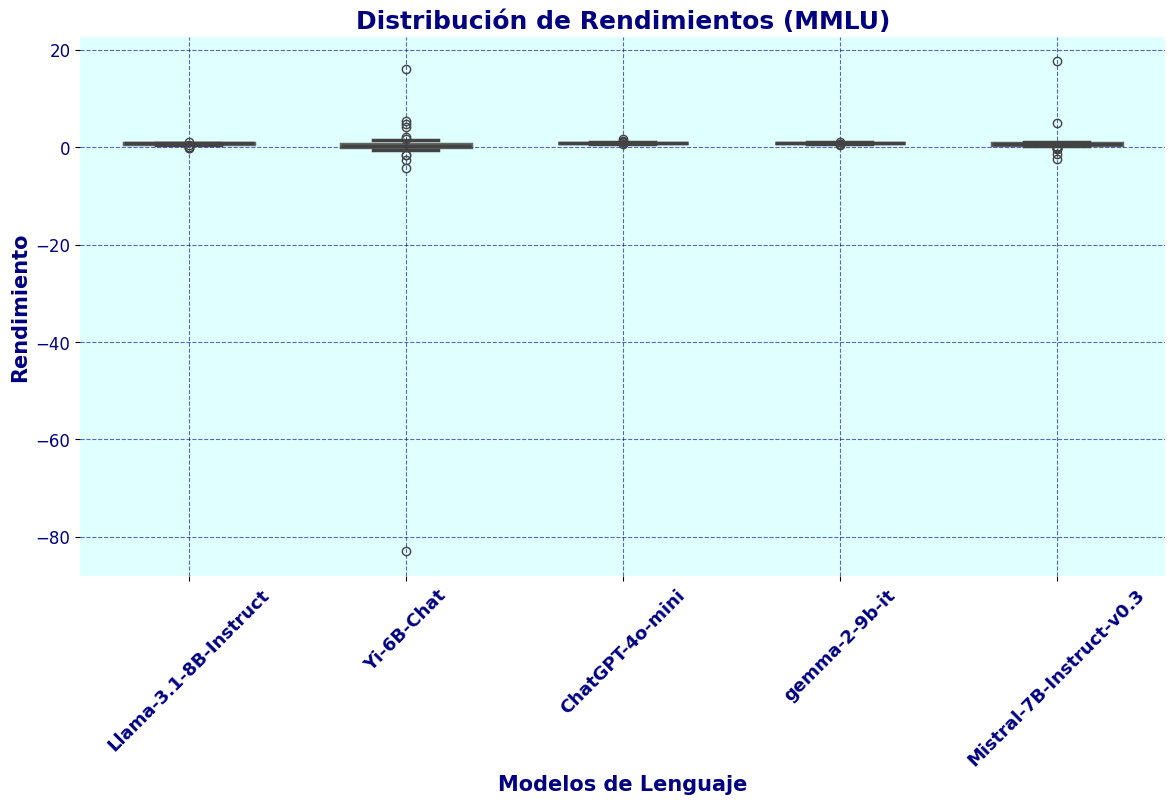


Tabla LaTeX guardada como resultados_MMLU.tex

Análisis para MMLU_pro:
Resultados de normalidad:
Llama-3.1-8B-Instruct: p-value = 0.5772392625968988 (Normal)
Yi-6B-Chat: p-value = 4.227578655008944e-07 (No normal)
ChatGPT-4o-mini: p-value = 0.9610576769036822 (Normal)
gemma-2-9b-it: p-value = 0.03778453827297871 (No normal)
Mistral-7B-Instruct-v0.3: p-value = 0.05851923123837257 (Normal)

Test de Levene (homogeneidad de varianza): p-value = 0.3221214918430982 (Varianzas homogéneas)

Kruskal-Wallis: p-value = 3.589314852990216e-09 (Diferencias significativas)


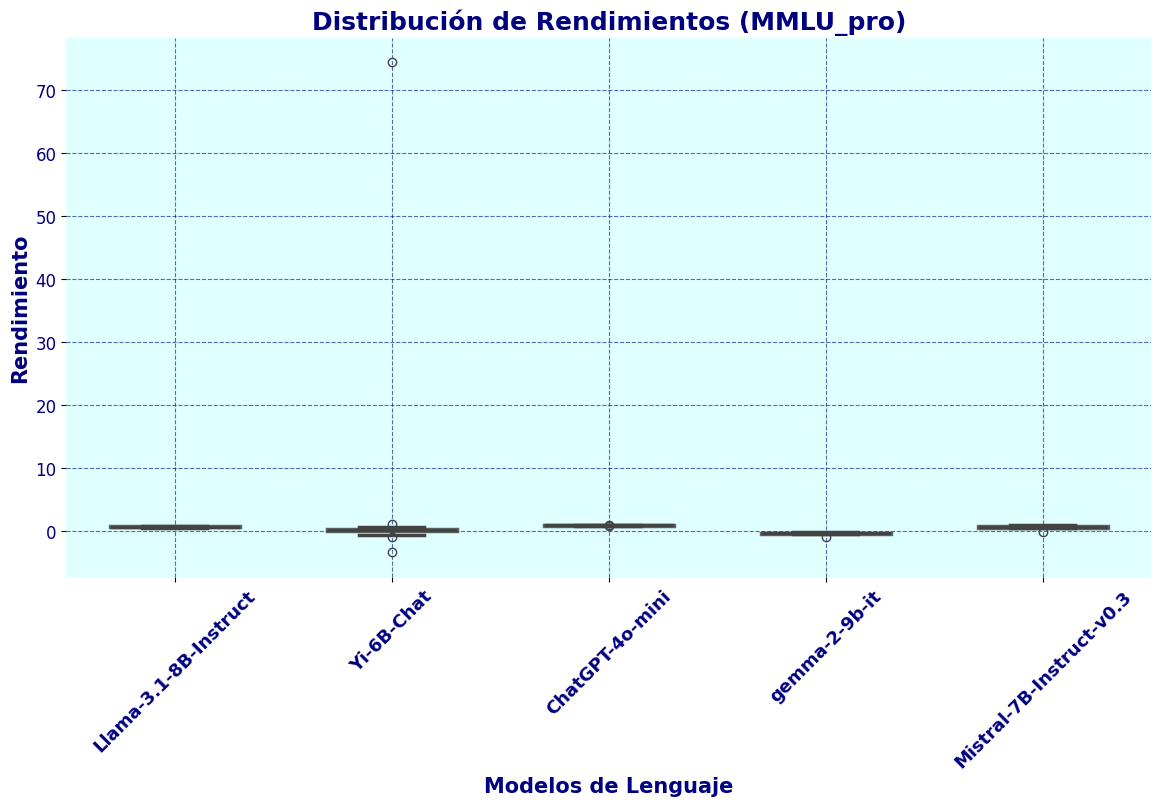


Tabla LaTeX guardada como resultados_MMLU_pro.tex


In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path, sheet_name):
    """Carga los datos desde un archivo Excel y da formato adecuado."""
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df.drop(columns=[col for col in df.columns if 'CATEGORY' in col.upper()], errors='ignore')  # Eliminar duplicados
    df.columns = [col.split('_')[0] for col in df.columns]  # Extraer nombres de modelos
    return df

def normality_test(df):
    """Aplica pruebas de normalidad a cada columna del DataFrame."""
    normality_results = {}
    for model in df.columns:
        data = df[model].dropna()
        if len(data) > 50:
            stat, p_value = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        else:
            stat, p_value = stats.shapiro(data)
        normality_results[model] = p_value
    return normality_results

def variance_homogeneity_test(df):
    """Aplica la prueba de Levene para verificar la homogeneidad de varianzas."""
    samples = [df[model].dropna() for model in df.columns]
    stat, p_value = stats.levene(*samples)
    return p_value

def statistical_tests(file_path, sheet_name):
    """Ejecuta los tests de normalidad, homogeneidad de varianzas y ANOVA/Kruskal-Wallis."""
    df = load_data(file_path, sheet_name)
    normality_results = normality_test(df)
    
    print("Resultados de normalidad:")
    for model, p_value in normality_results.items():
        print(f"{model}: p-value = {p_value} ({'Normal' if p_value > 0.05 else 'No normal'})")
    
    var_homogeneity_p = variance_homogeneity_test(df)
    print(f"\nTest de Levene (homogeneidad de varianza): p-value = {var_homogeneity_p} ({'Varianzas homogéneas' if var_homogeneity_p > 0.05 else 'Varianzas no homogéneas'})")
    
    samples = [df[model].dropna() for model in df.columns]
    if all(p > 0.05 for p in normality_results.values()) and var_homogeneity_p > 0.05:
        stat, p_value = stats.f_oneway(*samples)
        test_name = "ANOVA"
    else:
        stat, p_value = stats.kruskal(*samples)
        test_name = "Kruskal-Wallis"
    print(f"\n{test_name}: p-value = {p_value} ({'Diferencias significativas' if p_value < 0.05 else 'No hay diferencias significativas'})")
    
    # Visualización mejorada con fondo azul turquesa claro y líneas azul marino
    plt.figure(figsize=(14, 7))
    palette = sns.color_palette("husl", len(df.columns))  # Generar una paleta de colores variada
    sns.boxplot(data=df, palette=palette, linewidth=2.5, fliersize=6, width=0.6, boxprops=dict(alpha=0.8))
    
    plt.xticks(rotation=45, fontsize=13, fontweight='bold', color='#000080')  # Azul marino
    plt.yticks(fontsize=12, color='#000080')
    plt.xlabel("Modelos de Lenguaje", fontsize=15, fontweight='bold', color="#000080")
    plt.ylabel("Rendimiento", fontsize=15, fontweight='bold', color="#000080")
    plt.title(f"Distribución de Rendimientos ({sheet_name})", fontsize=18, fontweight='bold', color="#000080")
    
    plt.grid(True, linestyle='--', alpha=0.6, color="#000080")  # Líneas en azul marino
    plt.gca().set_facecolor('#E0FFFF')  # Fondo azul turquesa claro
    sns.despine(left=True, bottom=True)  # Remover bordes para una visualización más limpia
    
    plt.show()
    
    # Generación de tabla en LaTeX
    table_latex = df.describe().to_latex()
    with open(f"resultados_{sheet_name}.tex", "w") as f:
        f.write(table_latex)
    print(f"\nTabla LaTeX guardada como resultados_{sheet_name}.tex")

# Ejemplo de uso:
file_path = 'RELACION_MODELOS.xlsx'  # Cambia esto por el nombre de tu archivo
sheets = ['MMLU', 'MMLU_pro']
for sheet in sheets:
    print(f"\nAnálisis para {sheet}:")
    statistical_tests(file_path, sheet)



Análisis para MMLU:
Resultados de normalidad:
Llama-3.1-8B-Instruct: p-value = 0.005771641423364171 (No normal)
ChatGPT-4o-mini: p-value = 0.008831338427599422 (No normal)
gemma-2-9b-it: p-value = 0.10443027324789245 (Normal)
phi-4: p-value = 0.03975570992055988 (No normal)
ChatGPT-4.1-nano: p-value = 1.1270423214122917e-13 (No normal)
Mistral-7B-Instruct-v0.3: p-value = 1.8622537876120768e-10 (No normal)

Test de Levene (homogeneidad de varianza): p-value = 0.08469453277602937 (Varianzas homogéneas)

Kruskal-Wallis: p-value = 3.929425629928055e-23 (Diferencias significativas)

Prueba post-hoc de Dunn:
                          ChatGPT-4.1-nano  ChatGPT-4o-mini  \
ChatGPT-4.1-nano              1.000000e+00     3.017439e-01   
ChatGPT-4o-mini               3.017439e-01     1.000000e+00   
Llama-3.1-8B-Instruct         1.079971e-10     8.870201e-05   
Mistral-7B-Instruct-v0.3      7.167370e-16     1.944432e-08   
gemma-2-9b-it                 1.000000e+00     1.000000e+00   
phi-4      

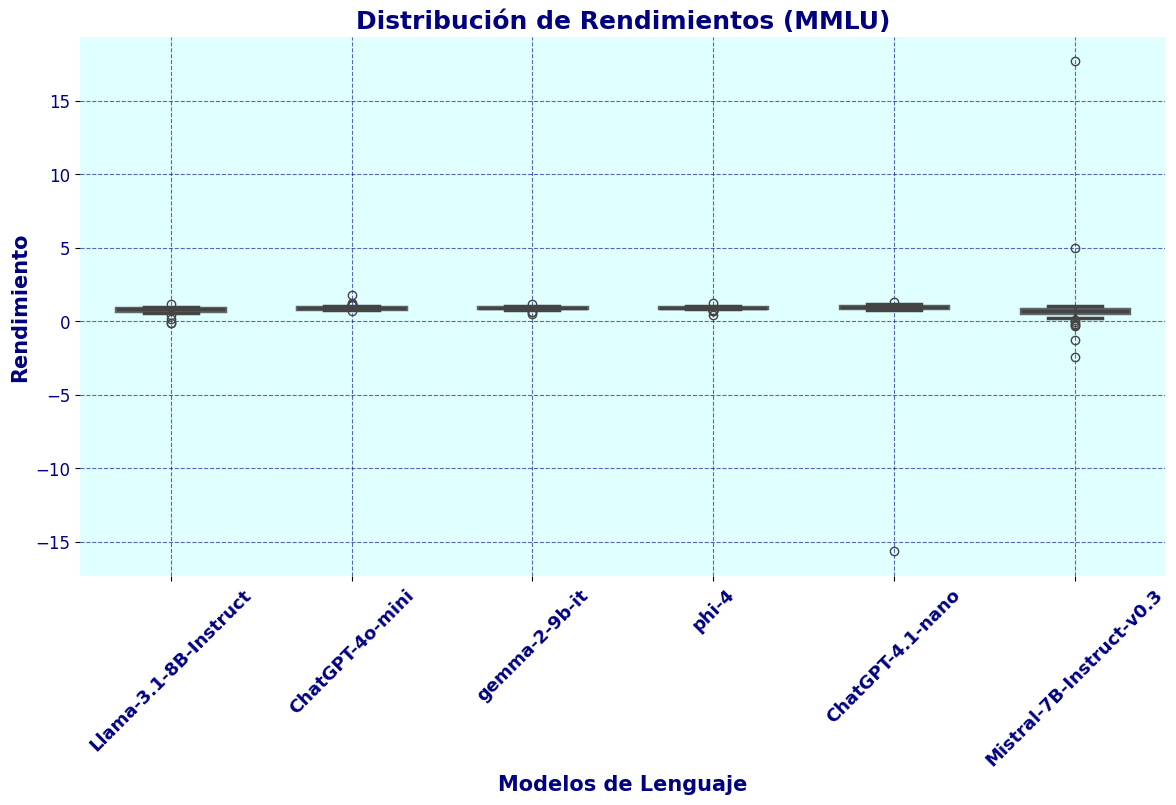


Tabla LaTeX guardada como resultados_MMLU.tex


/var/folders/c2/7s13mf2d2v363_1g197xk9bm0000gn/T/ipykernel_1441/1942735297.py:103: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  color_mask = posthoc_results.applymap(lambda x: 1 if x >= 0.05 else 0)
/var/folders/c2/7s13mf2d2v363_1g197xk9bm0000gn/T/ipykernel_1441/1942735297.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[i, j] = "1"
/var/folders/c2/7s13mf2d2v363_1g197xk9bm0000gn/T/ipykernel_1441/1942735297.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '#000000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  text_colors.loc[i, j] = "#000000"
/var/folders/c2/7s13mf2d2v363_1g197xk9bm0000gn/T/ipykernel_1441/1942735297.py:119:

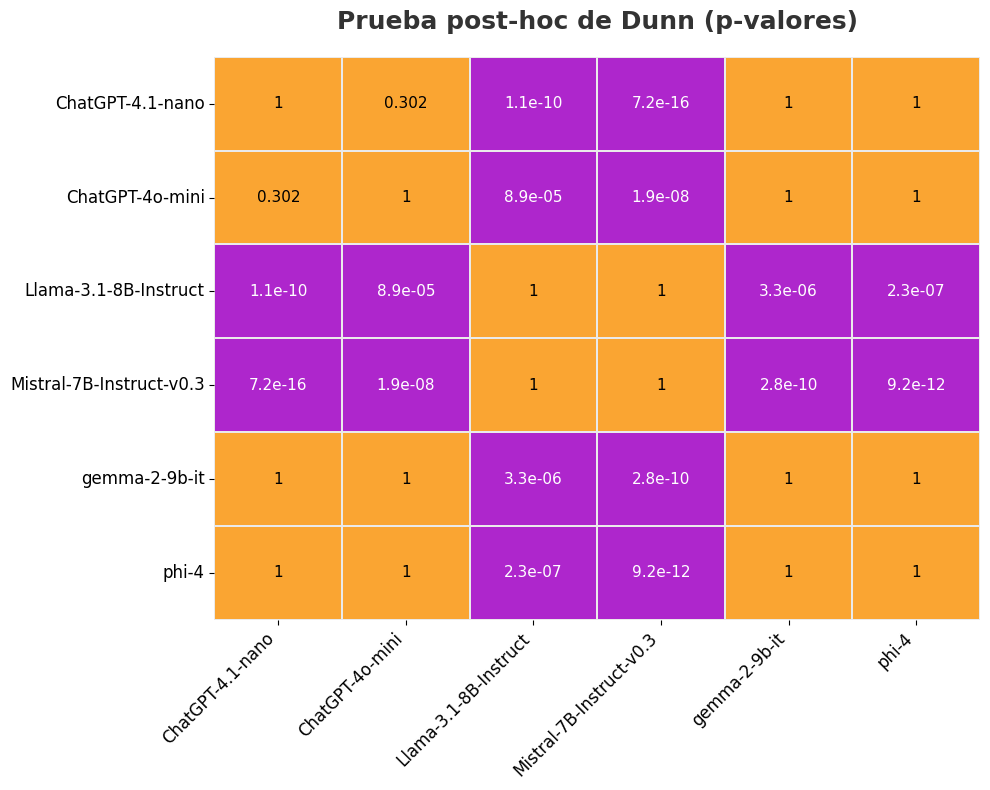

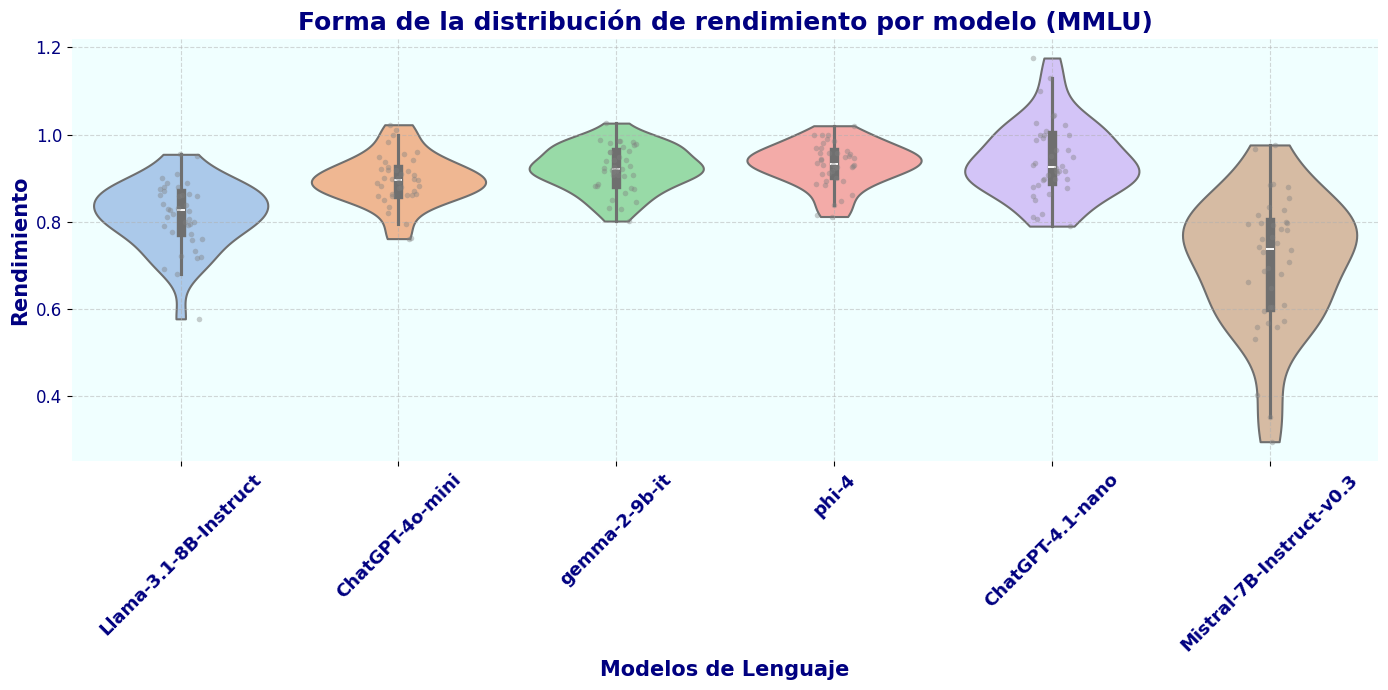

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scikit_posthocs import posthoc_dunn
import matplotlib.ticker as mticker 
from matplotlib.colors import ListedColormap

def load_data(file_path, sheet_name):
    """Carga los datos desde un archivo Excel y da formato adecuado."""
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df.drop(columns=[col for col in df.columns if 'CATEGORY' in col.upper()], errors='ignore')  # Eliminar duplicados
    df.columns = [col.split('_')[0] for col in df.columns]  # Extraer nombres de modelos
    return df

def normality_test(df):
    """Aplica pruebas de normalidad a cada columna del DataFrame."""
    normality_results = {}
    for model in df.columns:
        data = df[model].dropna()
        if len(data) > 50:
            stat, p_value = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        else:
            stat, p_value = stats.shapiro(data)
        normality_results[model] = p_value
    return normality_results

def variance_homogeneity_test(df):
    """Aplica la prueba de Levene para verificar la homogeneidad de varianzas."""
    samples = [df[model].dropna() for model in df.columns]
    stat, p_value = stats.levene(*samples)
    return p_value

def posthoc_dunn_test(df):
    """Aplica la prueba post-hoc de Dunn para comparaciones por pares."""
    melted_df = df.melt(var_name='Model', value_name='Value').dropna()
    posthoc_results = posthoc_dunn(melted_df, val_col='Value', group_col='Model', p_adjust='bonferroni')
    return posthoc_results

def statistical_tests(file_path, sheet_name):
    """Ejecuta los tests de normalidad, homogeneidad de varianzas, ANOVA/Kruskal-Wallis y post-hoc."""
    df = load_data(file_path, sheet_name)
    normality_results = normality_test(df)
    
    print("Resultados de normalidad:")
    for model, p_value in normality_results.items():
        print(f"{model}: p-value = {p_value} ({'Normal' if p_value > 0.05 else 'No normal'})")
    
    var_homogeneity_p = variance_homogeneity_test(df)
    print(f"\nTest de Levene (homogeneidad de varianza): p-value = {var_homogeneity_p} ({'Varianzas homogéneas' if var_homogeneity_p > 0.05 else 'Varianzas no homogéneas'})")
    
    samples = [df[model].dropna() for model in df.columns]
    if all(p > 0.05 for p in normality_results.values()) and var_homogeneity_p > 0.05:
        stat, p_value = stats.f_oneway(*samples)
        test_name = "ANOVA"
    else:
        stat, p_value = stats.kruskal(*samples)
        test_name = "Kruskal-Wallis"
    print(f"\n{test_name}: p-value = {p_value} ({'Diferencias significativas' if p_value < 0.05 else 'No hay diferencias significativas'})")
    
    # Si Kruskal-Wallis indica diferencias significativas, aplicar prueba post-hoc de Dunn
    if test_name == "Kruskal-Wallis" and p_value < 0.05:
        print("\nPrueba post-hoc de Dunn:")
        posthoc_results = posthoc_dunn_test(df)
        print(posthoc_results)
        
        # Guardar la matriz de resultados en un archivo Excel
        posthoc_results.to_excel(f"posthoc_dunn_{sheet_name}.xlsx")
        print(f"Matriz de resultados post-hoc guardada como posthoc_dunn_{sheet_name}.xlsx")
    
    # Visualización mejorada con fondo azul turquesa claro y líneas azul marino
    plt.figure(figsize=(14, 7))
    palette = sns.color_palette("husl", len(df.columns))  # Generar una paleta de colores variada
    sns.boxplot(data=df, palette=palette, linewidth=2.5, fliersize=6, width=0.6, boxprops=dict(alpha=0.8))
    
    plt.xticks(rotation=45, fontsize=13, fontweight='bold', color='#000080')  # Azul marino
    plt.yticks(fontsize=12, color='#000080')
    plt.xlabel("Modelos de Lenguaje", fontsize=15, fontweight='bold', color="#000080")
    plt.ylabel("Rendimiento", fontsize=15, fontweight='bold', color="#000080")
    plt.title(f"Distribución de Rendimientos ({sheet_name})", fontsize=18, fontweight='bold', color="#000080")
    
    plt.grid(True, linestyle='--', alpha=0.6, color="#000080")  # Líneas en azul marino
    plt.gca().set_facecolor('#E0FFFF')  # Fondo azul turquesa claro
    sns.despine(left=True, bottom=True)  # Remover bordes para una visualización más limpia
    
    plt.show()
    
    # Generación de tabla en LaTeX
    table_latex = df.describe().to_latex()
    with open(f"resultados_{sheet_name}.tex", "w") as f:
        f.write(table_latex)
    print(f"\nTabla LaTeX guardada como resultados_{sheet_name}.tex")
    
    if test_name == "Kruskal-Wallis" and p_value < 0.05:

        plt.figure(figsize=(10, 8))  # Más compacto

        # Colores pastel personalizados
        cmap = ListedColormap(["#AE26CC", "#FAA532"])  # Rosa fuerte y verde pastel

        # Mapeo de colores según significancia
        color_mask = posthoc_results.applymap(lambda x: 1 if x >= 0.05 else 0)

        # Crear anotaciones personalizadas y elegir color dinámico para el texto
        annotations = posthoc_results.copy()
        text_colors = annotations.copy()

        for i in annotations.index:
            for j in annotations.columns:
                val = annotations.loc[i, j]
                if pd.isnull(val):
                    annotations.loc[i, j] = ""
                    text_colors.loc[i, j] = "#000000"
                elif val == 1:
                    annotations.loc[i, j] = "1"
                    text_colors.loc[i, j] = "#000000"
                elif val >= 0.05:
                    annotations.loc[i, j] = f"{val:.3f}"
                    text_colors.loc[i, j] = "#000000"
                else:
                    annotations.loc[i, j] = f"{val:.1e}"
                    text_colors.loc[i, j] = "#ffffff"

        # Función personalizada para pintar con colores por celda
        def annotate_heatmap(ax, data, colors):
            for y in range(data.shape[0]):
                for x in range(data.shape[1]):
                    val = data.iloc[y, x]
                    if val != "":
                        ax.text(
                            x + 0.5,
                            y + 0.5,
                            val,
                            ha='center',
                            va='center',
                            color=colors.iloc[y, x],
                            fontsize=11
                        )

        # Crear el heatmap sin anotaciones automáticas
        ax = sns.heatmap(
            color_mask,
            cmap=cmap,
            cbar=False,
            square=False,  # Celdas más ajustadas
            linewidths=0.1,
            linecolor='#eaeaea'
        )

        annotate_heatmap(ax, annotations, text_colors)

        plt.title("Prueba post-hoc de Dunn (p-valores)", fontsize=18, fontweight='bold', color="#333333", pad=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(rotation=0, fontsize=12)
        ax.set_facecolor('#ffffff')
        plt.tight_layout()
        plt.show()

    # ESTADÍSTICAS COMPLEMENTARIAS PARA COMPARAR FORMAS
    # --- FILTRADO DE OUTLIERS PARA VISUALIZACIÓN DE FORMA DE DISTRIBUCIÓN ---
    df_cleaned = df.copy()  # Usamos la copia limpia del dataframe original
    
    # Convertimos todo a numérico por si acaso hay textos ocultos
    df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')
    
    # Eliminamos outliers usando el rango intercuartílico (IQR)
    Q1 = df_cleaned.quantile(0.25)
    Q3 = df_cleaned.quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

    # --- GRAFICO PARA VER LA FORMA DE LOS GRUPOS SIN DISTORSIONES ---
    plt.figure(figsize=(14, 7))
    palette = sns.color_palette("pastel", len(df_filtered.columns))

    sns.violinplot(data=df_filtered, palette=palette, inner="box", linewidth=1.5, cut=0)
    sns.stripplot(data=df_filtered, color='gray', alpha=0.4, jitter=True, size=4)

    plt.xticks(rotation=45, fontsize=13, fontweight='bold', color='#000080')
    plt.yticks(fontsize=12, color='#000080')
    plt.xlabel("Modelos de Lenguaje", fontsize=15, fontweight='bold', color="#000080")
    plt.ylabel("Rendimiento", fontsize=15, fontweight='bold', color="#000080")
    plt.title(f"Forma de la distribución de rendimiento por modelo ({sheet_name})", fontsize=18, fontweight='bold', color="#000080")

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#F0FFFF')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()


# Ejemplo de uso:
file_path = 'RELACION_MODELOS.xlsx'  # Cambia esto por el nombre de tu archivo
sheet = 'MMLU'  # Solo para MMLU
print(f"\nAnálisis para {sheet}:")
statistical_tests(file_path, sheet)